<a href="https://colab.research.google.com/github/JoGyeongDeok/Project/blob/main/Dacon/2021_12_31_A_contest_to_predict_the_rental_volume_of_Ttareungi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A contest to predict the rental volume of Ttareungi

## 1.Library & Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')      

Mounted at /content/drive


In [ ]:
# !mkdir "/content/drive/MyDrive/DACON/Data/A contest to predict the rental volume of Ttareungi"
# !unzip "/content/drive/MyDrive/DACON/Data/A contest to predict the rental volume of Ttareungi.zip" -d "/content/drive/MyDrive/DACON/Data/A contest to predict the rental volume of Ttareungi"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline 

In [ ]:
path='/content/drive/MyDrive/DACON/Data/A contest to predict the rental volume of Ttareungi/'

In [ ]:
train=pd.read_csv(path+'train.csv')
test=pd.read_csv(path+'test.csv')
submission=pd.read_csv(path+'sample_submission.csv')

## 2. Data Preprocess

In [ ]:
train.date_time=pd.to_datetime(train.date_time)
train['week'] = pd.to_datetime(train['date_time']).dt.week
train['weekday'] = pd.to_datetime(train['date_time']).dt.weekday

test.date_time=pd.to_datetime(test.date_time)
test['week'] = pd.to_datetime(test['date_time']).dt.week
test['weekday'] = pd.to_datetime(test['date_time']).dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
train['date']=0
train.loc[train.date_time.dt.year==2018,'date']=range(0,91)
train.loc[train.date_time.dt.year==2019,'date']=range(0,91)
train.loc[train.date_time.dt.year==2020,'date']=range(0,91)
test['date']=range(0,91)

In [ ]:
def draw_plot(data):
  count=1
  for year in [2018,2019,2020]:
    plt.subplot(3,1,count)
    plt.plot(data.loc[(data.date_time>=datetime(year,1,1)) & (data.date_time<=datetime(year,12,31)),'number_of_rentals'])
    count=count+1
    plt.show()

In [ ]:
def min_max(data):
  data=data.reset_index(drop=True)
  new_data=[]
  for i in range(data.shape[0]):
    new_data.append((data[i]-data.min())/(data.max()-data.min()))
  return new_data

In [ ]:
def return_min_max(data,_max,_min):
  data=data.reset_index(drop=True)
  new_data=[]
  for i in range(data.shape[0]):
    new_data.append(data[i]*(_max-_min)+_min)
  return new_data

In [ ]:
for year in [2018,2019,2020]:
  print(train.loc[train.date_time.dt.year==year,'number_of_rentals'].max())
for year in [2018,2019,2020]:
  print(train.loc[train.date_time.dt.year==year,'number_of_rentals'].min())

49116
88432
110377
1037
12749
7600


In [ ]:
train.loc[(train.date_time.dt.year==2020)&(train.number_of_rentals<20000)]

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,week,weekday,date
220,2020-05-09,144.142,4.000,1.000,4.192,80.034,13.938,21.158,82.162,7600,19,5,38
226,2020-05-15,140.966,3.865,0.723,3.804,69.122,15.875,22.263,61.216,13782,20,4,44
266,2020-06-24,124.797,3.973,0.716,3.203,76.182,21.375,26.421,62.500,19756,26,2,84


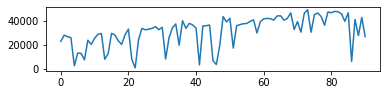

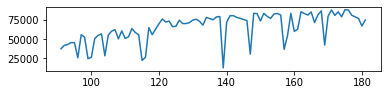

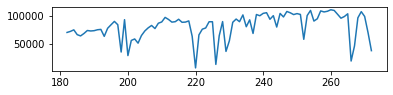

In [ ]:
draw_plot(train)

In [ ]:
train.loc[train.date_time.dt.year==2018,'number_of_rentals']=min_max(train.loc[train.date_time.dt.year==2018,'number_of_rentals'])
train.loc[train.date_time.dt.year==2019,'number_of_rentals']=min_max(train.loc[train.date_time.dt.year==2019,'number_of_rentals'])
train.loc[train.date_time.dt.year==2020,'number_of_rentals']=min_max(train.loc[train.date_time.dt.year==2020,'number_of_rentals'])

In [ ]:
new_data=train.copy()

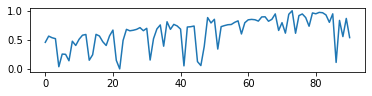

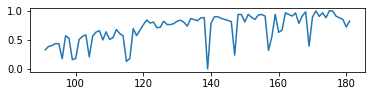

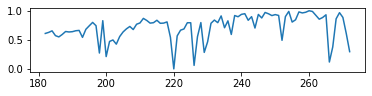

In [ ]:
draw_plot(train)

In [ ]:
train.loc[(train.date_time>=datetime(2018,1,1)) & (train.date_time<=datetime(2018,12,31)),'number_of_rentals']=return_min_max(train.loc[(train.date_time>=datetime(2018,1,1)) & (train.date_time<=datetime(2018,12,31)),'number_of_rentals'],49116,1037)
train.loc[(train.date_time>=datetime(2019,1,1)) & (train.date_time<=datetime(2019,12,31)),'number_of_rentals']=return_min_max(train.loc[(train.date_time>=datetime(2019,1,1)) & (train.date_time<=datetime(2019,12,31)),'number_of_rentals'],88432,1037)
train.loc[(train.date_time>=datetime(2020,1,1)) & (train.date_time<=datetime(2020,12,31)),'number_of_rentals']=return_min_max(train.loc[(train.date_time>=datetime(2020,1,1)) & (train.date_time<=datetime(2020,12,31)),'number_of_rentals'],110377,1037)

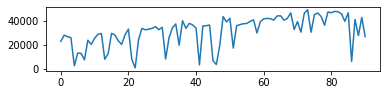

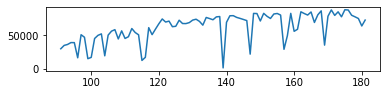

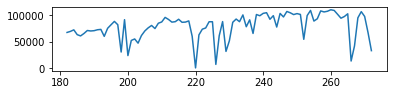

In [ ]:
draw_plot(train)

In [ ]:
train_label=new_data['number_of_rentals']
train_X=new_data.drop(['wind_direction','precipitation_form','date_time','number_of_rentals','date','week'],axis=1)
test.drop(['wind_direction','precipitation_form','date_time','date','week'],axis=1,inplace=True)

## 3. 모델링


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0, n_estimators = 100)
rf.fit(train_X,train_label)
predict=rf.predict(test)

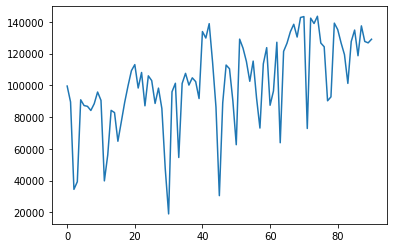

In [ ]:
_max=150000
_min=1037
data=predict
new_data=[]
for i in range(data.shape[0]):
  new_data.append(data[i]*(_max-_min)+_min)
plt.plot(new_data)

In [ ]:
submission['number_of_rentals']=new_data
submission.to_csv(path+'submission17.csv',index=False)